# Neural Networks for Abalone Dataset in Biology
We use "abalone", a biological dataset. The target feature is Rings: integer variable representing the age of the abalone (the number of rings on the shell). The goal of the dataset is to predict the age of the abalone (i.e., the number of rings) based on its physical characteristics. 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from utils import model1, model2, model3, model4, helper

## 1. EDA (Reading, Cleaning and Inspecting Data)

In [ ]:
df = pd.read_csv('abalone.csv')

In [2]:
df = df.dropna()

In [3]:
display(df)

,Type,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [129]:
# we drop the first column w non-numerical values
df = df.drop(columns='Type')
df

,LongestShell,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 2. Splitting Data

In [130]:
X = df.drop(columns='Rings')
y = df['Rings']
print(X)
print(y)

      LongestShell  Diameter  Height  WholeWeight  ShuckedWeight  \
0            0.455     0.365   0.095       0.5140         0.2245   
1            0.350     0.265   0.090       0.2255         0.0995   
2            0.530     0.420   0.135       0.6770         0.2565   
3            0.440     0.365   0.125       0.5160         0.2155   
4            0.330     0.255   0.080       0.2050         0.0895   
...            ...       ...     ...          ...            ...   
4172         0.565     0.450   0.165       0.8870         0.3700   
4173         0.590     0.440   0.135       0.9660         0.4390   
4174         0.600     0.475   0.205       1.1760         0.5255   
4175         0.625     0.485   0.150       1.0945         0.5310   
4176         0.710     0.555   0.195       1.9485         0.9455   

      VisceraWeight  ShellWeight  
0            0.1010       0.1500  
1            0.0485       0.0700  
2            0.1415       0.2100  
3            0.1140       0.1550  
4       

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

# 3. Training with Neural Network Models

## 3.1. Model 1: only w three dense layers

In [131]:
model1 = model1.model1()

# Compile the model
model.compile(optimizer='adam', 
              loss=MeanSquaredLogarithmicError(), 
              metrics=['msle'])

newmodel.summary()

/home/rahkooy/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [133]:
# Compiling with Earlystopping to avoid over/underfitting:

early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

history1 = model1.fit(
    X_train,y_train,
    validation_data=(X_test,y_test),
    batch_size=256,
    epochs = 256,
    callbacks=[early_stopping],
    verbose=0 #turns off training log
)

Epoch 1/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.7732 - val_loss: 8.8823
Epoch 2/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3417 - val_loss: 6.0465
Epoch 3/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8062 - val_loss: 2.7031
Epoch 4/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7782 - val_loss: 2.2052
Epoch 5/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2079 - val_loss: 2.0503
Epoch 6/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0717 - val_loss: 1.9456
Epoch 7/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9596 - val_loss: 1.8694
Epoch 8/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8590 - val_loss: 1.8391
Epoch 9/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7482 - val_loss: 1.8520
Epoch 10/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8116 - val_loss: 1.8198
Epoch 11/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7790 - val_loss: 1.8094
Epoch 12/256
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8

<AxesSubplot:>

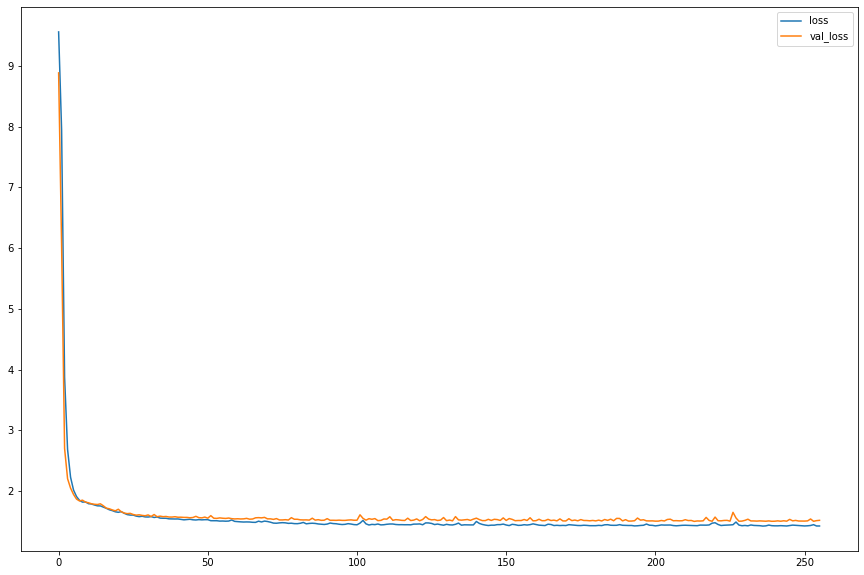

In [134]:
history_df1 = pd.DataFrame(history1.history)
history_df1.plot(figsize=(15,10))
print("min validation loss: {}".format(history_df['val_loss'].min()))

## 3.2. Model 2: only with dense layers of depth twice model1

## 3.2. Model 3: with dense layers of depth twice model1, and Dropout and Normalisation after each dense layer